In [1]:
# This mounts your Google Drive to the Colab VM
#from google.colab import drive
#drive.mount('/content/drive')

#assignment folder, e.g. 'cs231n/assignments/assignment1/'
#FOLDERNAME = 'cs231n/assignments/assignment1/'
#assert FOLDERNAME is not None, "[!]Enter the foldername"

# Mounting your Drive allows the Python interpreter of Colab VM
# to load python files from within it
#import sys
#sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# Download CIFAR-10
#%cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
#!bash get_datasets.sh
#%cd /content/drive/My\ Drive/$FOLDERNAME

# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](https://course.cse.ust.hk/comp4901j/Password_Only/programs/assignment1/index.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [2]:
from __future__ import print_function
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [4]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [5]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
svm = LinearSVM()

for lr in learning_rates:
    for reg in regularization_strengths:
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg, num_iters=1500)
        
        y_train_pred = svm.predict(X_train_feats)
        acc_train = np.mean(y_train == y_train_pred)
        
        y_val_pred = svm.predict(X_val_feats)
        acc_val = np.mean(y_val == y_val_pred)
        
        results[(lr, reg)] = (acc_train, acc_val)
        
        if acc_val > best_val:
            best_val = acc_val
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.105020 val accuracy: 0.103000
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.105327 val accuracy: 0.103000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.198735 val accuracy: 0.186000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.414592 val accuracy: 0.415000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.416510 val accuracy: 0.417000
lr 1.000000e-08 reg 5.000000e+06 train accuracy: 0.406245 val accuracy: 0.397000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.416000 val accuracy: 0.427000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.413551 val accuracy: 0.415000
lr 1.000000e-07 reg 5.000000e+06 train accuracy: 0.352122 val accuracy: 0.379000
best validation accuracy achieved during cross-validation: 0.427000


In [6]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.363


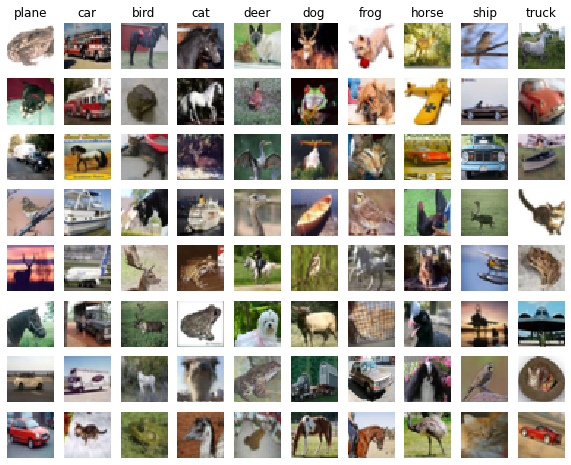

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

Yes. For instance, we can observe samples of a duck, a car, a horse and truck in the ship class. This observation might seem odd but when examined closely, we can see that the background of the duck, car, horse and truck are blue and in open space, which is the generally how a ship image might look like. These classes are mistakenly matched due to their similar background colors. As such these classes are grouped together by the color histogram. 

Additionaly, we see animals like deer, dog and moose in the horse class. This is not a coincidence as these animals have similar appearances such as similar facial features like nose, ears and the mouth. These features are captured by the HOG. 

From this example, we observe that HOG and color histogram features are weak especially in inter-class variations and is unable to help us to distinguish between classes with high accuracy.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [8]:
print(X_train_feats.shape)

(49000, 155)


In [9]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# Define discrete hyperparameters to sweep through 
hidden_size = [500]
learning_rate = [1]
reg = [1e-4]
best_acc = -1

log = {}

for hs in hidden_size:
    for lr in learning_rate:
        for r in reg:
            
            # Set up the network
            net = TwoLayerNet(input_dim, hs, num_classes)

            # Train the network
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                        num_iters=1000, batch_size=200,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg=r, verbose=False)
            
            acc = stats['val_acc_history'][-1]
            log[(hs, lr, r)] = acc
            
            # Print Log
            print('for hs: %e, lr: %e and r: %e, valid accuracy is: %f' 
                    % (hs, lr, r, acc))
            
            if acc > best_acc:
                best_net = net
                best_acc = acc
                
print('Best Networks has an Accuracy of: %f' % best_acc)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

for hs: 5.000000e+02, lr: 1.000000e+00 and r: 1.000000e-04, valid accuracy is: 0.561000
Best Networks has an Accuracy of: 0.561000


In [10]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.572


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

# Testing downloaded images using K-nearest neighbour Classifier
In this section, we will attempt to test the capabilities of the k-nearest neighbour classifier on 2 images: A cat image and a car image.
We will print the "y_test_pred", which the lable of the image at the end of the testing to see if K-nearest neighbour classifier will be able to classify both images to their correct classes. 

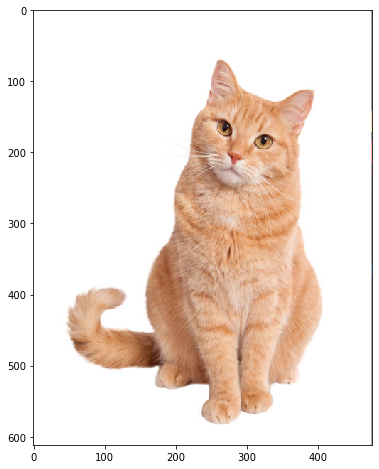

Shape of image is:  (612, 477, 3)


In [11]:
#Import Libraries
from PIL import Image
import matplotlib.pyplot as plt
import imageio
import numpy as np

#Read image
img=Image.open('features.jpeg')
#show image
plt.imshow(img)
plt.show()

im = imageio.imread('features.jpeg') #read image, convert to data and store in array
print("Shape of image is: ",im.shape) #shows the dimensions of the read image

We will now shrink the cat image to 32 * 32 * 3, plot and print the shape of the image

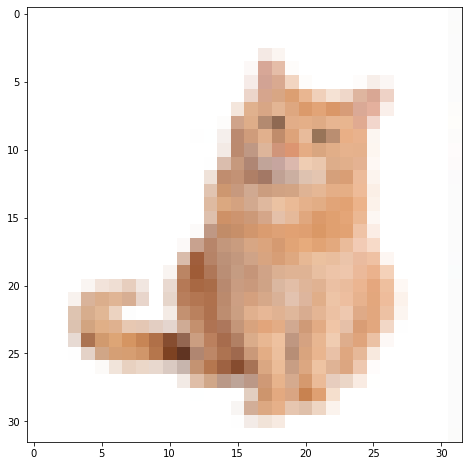

Shape of image is:  (32, 32, 3)
(1, 32, 32, 3)


In [12]:
image = Image.open('features.jpeg')
new_image = image.resize((32, 32))
new_image.save('features_3072.jpeg')

plt.imshow(new_image)
plt.show()

new_image_pixel = imageio.imread('features_3072.jpeg') 
print("Shape of image is: ",new_image_pixel.shape)
new_image_pixel = new_image_pixel[np.newaxis,:]
print(new_image_pixel.shape)

In [13]:
# Reshape the image data into rows
print(new_image_pixel.shape[0])
X_test = np.reshape(new_image_pixel, (new_image_pixel.shape[0], -1)) #becomes 500 by 3072
print(X_test.shape)

1
(1, 3072)


In [14]:
from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: (no operation)
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [15]:
print(new_image_pixel.shape)
X_train = np.reshape(X_train, (X_train.shape[0], -1)) #becomes 5000 by 3072 
new_image_pixel = np.reshape(new_image_pixel, (new_image_pixel.shape[0], -1)) #becomes 500 by 3072
print(X_train.shape, new_image_pixel.shape)

from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: (no operation)
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

dists = classifier.compute_distances_two_loops(new_image_pixel)
print(new_image_pixel.shape[0]) #.shape[0,1] 0: 500, 1:3072
print(dists.shape)

y_test_pred = classifier.predict_labels(dists, k=1)


(1, 32, 32, 3)
(49000, 3072) (1, 3072)
1
(1, 49000)


In [16]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
num_test = 500
y_test_pred = classifier.predict_labels(dists, k=5)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute and print the fraction of correctly predicted examples
#num_correct = np.sum(y_test_pred == y_test)
#accuracy = float(num_correct) / num_test
#print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
#enumerate(classes)
print("Predicted label is :", y_test_pred)

Predicted label is : [3.]


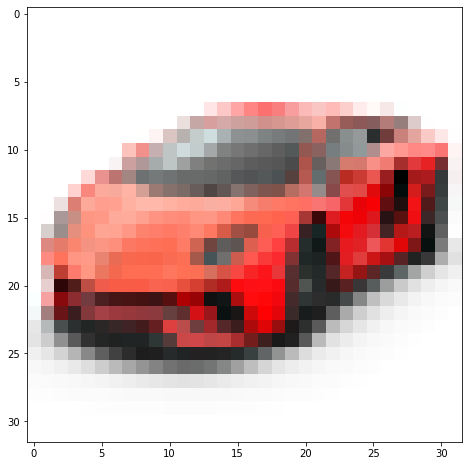

Shape of image is:  (32, 32, 3)
(1, 32, 32, 3)


In [17]:
#We will now attempt to test this on another image: car
image = Image.open('red_lambo.jpeg')
new_image = image.resize((32, 32))
new_image.save('red_lambo_3072.jpeg')

plt.imshow(new_image)
plt.show()

new_image_pixel_lambo = imageio.imread('red_lambo_3072.jpeg') 
print("Shape of image is: ",new_image_pixel_lambo.shape)
new_image_pixel_lambo = new_image_pixel_lambo[np.newaxis,:]
print(new_image_pixel_lambo.shape)

In [18]:
# Reshape the image data into rows
print(new_image_pixel_lambo.shape[0])
X_test = np.reshape(new_image_pixel_lambo, (new_image_pixel_lambo.shape[0], -1)) #becomes 500 by 3072
print(X_test.shape)

1
(1, 3072)


In [19]:
print(new_image_pixel_lambo.shape)
X_train = np.reshape(X_train, (X_train.shape[0], -1)) #becomes 5000 by 3072 
new_image_pixel_lambo = np.reshape(new_image_pixel_lambo, (new_image_pixel_lambo.shape[0], -1)) #becomes 500 by 3072
print(X_train.shape, new_image_pixel_lambo.shape)

from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: (no operation)
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

dists = classifier.compute_distances_two_loops(new_image_pixel_lambo)
print(new_image_pixel_lambo.shape[0]) #.shape[0,1] 0: 500, 1:3072
print(dists.shape)

y_test_pred = classifier.predict_labels(dists, k=1)

(1, 32, 32, 3)
(49000, 3072) (1, 3072)
1
(1, 49000)


In [20]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
num_test = 500
y_test_pred = classifier.predict_labels(dists, k=5)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute and print the fraction of correctly predicted examples
#num_correct = np.sum(y_test_pred == y_test)
#accuracy = float(num_correct) / num_test
#print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
#enumerate(classes)
print("Predicted label is :", y_test_pred)

Predicted label is : [1.]


## Conclusion
The KNN Classifier was able to classify both images to their correct class, provided their image structure closely resembles those of CIFAR-10. 